In [2]:
from project.models import Project
import geopandas
import shapely
import contextily

# from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt

diagnostic = Project.objects.all().order_by('?').first()
diagnostic

<Project: Diagnostic de CA de Cambrai>

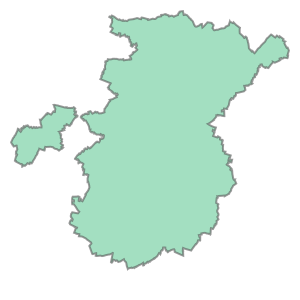

In [3]:
geom = diagnostic.combined_emprise.transform("2154", clone=True)
srid, wkt = geom.ewkt.split(";")
polygons = shapely.wkt.loads(wkt)

polygons

In [4]:
gdf_emprise = geopandas.GeoDataFrame(
    {
        "col1": ["emprise diagnostic"],
        "geometry": [polygons],
    },
    crs="EPSG:2154",
).to_crs(epsg=3857)

gdf_emprise

col1                                           geometry
0  emprise diagnostic  MULTIPOLYGON (((336363.838 6472639.005, 336402...

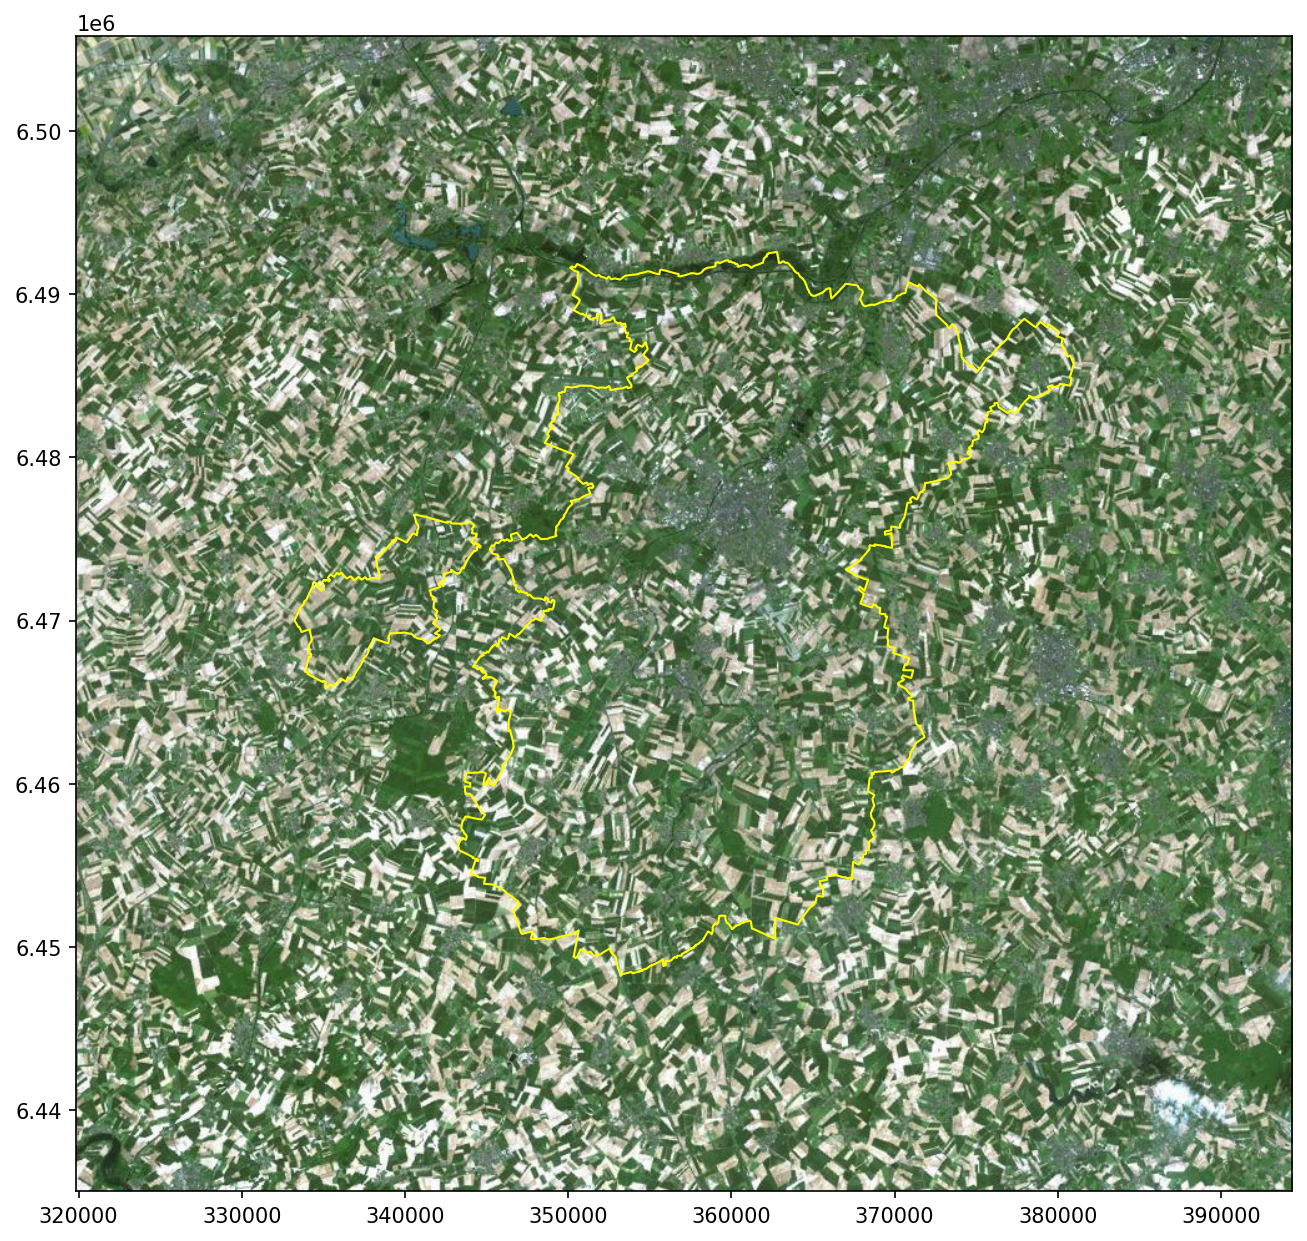

In [6]:
fig, ax = plt.subplots(figsize=(60, 10))
fig.set_dpi(150)

gdf_emprise.buffer(10000).plot(ax=ax, facecolor="none", edgecolor="none")
gdf_emprise.plot(ax=ax, facecolor="none", edgecolor="yellow")
contextily.add_basemap(
    ax,
    source=(
        "https://wxs.ign.fr/ortho/geoportail/wmts?"
        "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
        "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
        "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
    ),
)

In [7]:
diagnostic.id

1369

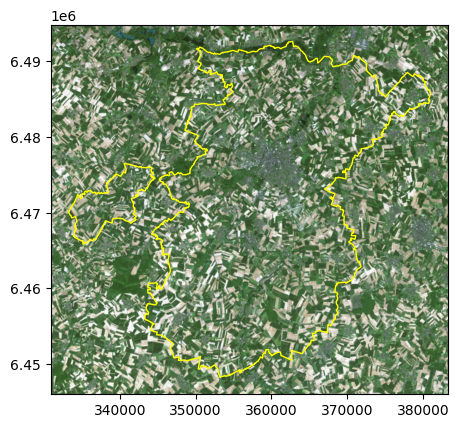

In [21]:
geom = diagnostic.combined_emprise
srid, wkt = geom.ewkt.split(";")
polygons = shapely.wkt.loads(wkt)
gdf_emprise = geopandas.GeoDataFrame(
    {
        "col1": ["emprise diagnostic"],
        "geometry": [polygons],
    },
    crs="EPSG:4326",
).to_crs(epsg=3857)
ax = gdf_emprise.plot(facecolor="none", edgecolor="yellow")
contextily.add_basemap(
    ax,
    source=(
        "https://wxs.ign.fr/ortho/geoportail/wmts?"
        "&REQUEST=GetTile&SERVICE=WMTS&VERSION=1.0.0&TILEMATRIXSET=PM"
        "&LAYER=ORTHOIMAGERY.ORTHOPHOTOS&STYLE=normal&FORMAT=image/jpeg"
        "&TILECOL={x}&TILEROW={y}&TILEMATRIX={z}"
    ),
)